# Apostolos Kozanitis 2558
# HW3
# SPACE-X 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, linear_model, metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [18]:
#Task 1 
path='./data/HW3.csv'
df=pd.read_csv(path)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [19]:
#Task 2
cols_to_iterate=['GridFins','Reused','Legs']
for col in cols_to_iterate :
    new_name= col + '_True'
    print(new_name)
    df[new_name]=df[col].astype(int)
    df=df.drop(col, axis= 'columns')
    
df.head()

GridFins_True
Reused_True
Legs_True


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,GridFins_True,Reused_True,Legs_True
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,NaN,1.0,0,B1003,-120.610829,34.632093,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,0


In [20]:
#Task 3
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [21]:
#Task 4
df['Class']=df['Outcome'].apply(lambda x : 1 if 'True' in x else 0  )
df['Class'].head(8)


0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
Name: Class, dtype: int64

In [22]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,GridFins_True,Reused_True,Legs_True,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,NaN,1.0,0,B1003,-120.610829,34.632093,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,0,0


In [23]:
#Task 5 
probas=df['Class'].value_counts(normalize=True)
pososto_epityxias=probas.iloc[0]
print(pososto_epityxias)

0.6666666666666666


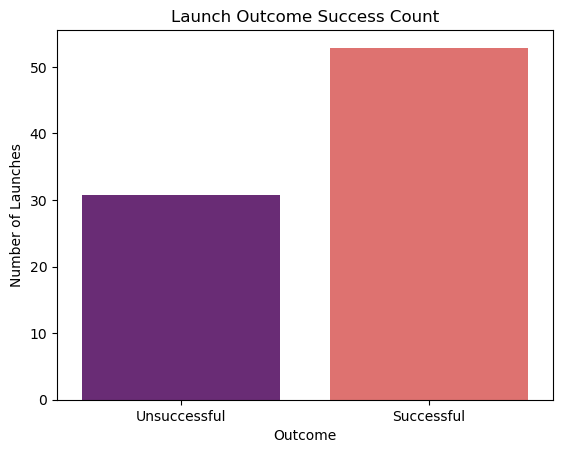

In [24]:
#Task 6 
df['new_class']=df['Class'].apply(lambda x : 'Successful' if x==1 else 'Unsuccessful'  )
sns.barplot(x='new_class',y='FlightNumber',data=df,ci=None , palette='magma')

plt.ylabel('Number of Launches')
plt.xlabel('Outcome')
plt.title("Launch Outcome Success Count")

plt.show()



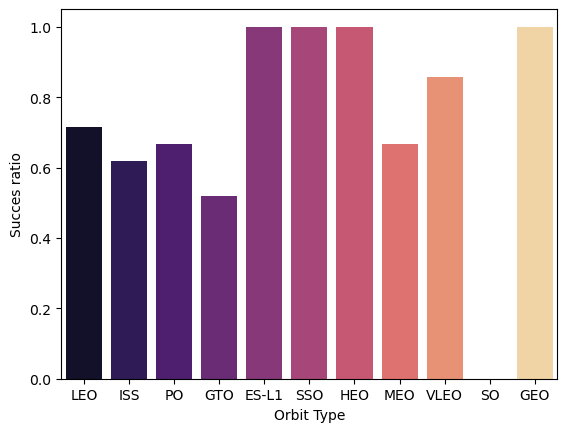

In [25]:
#Task7
sns.barplot(x='Orbit',y='Class',data=df,ci=None,palette='magma')

plt.xlabel('Orbit Type')
plt.ylabel('Succes ratio')
plt.show()

<AxesSubplot:xlabel='PayloadMass', ylabel='LaunchSite'>

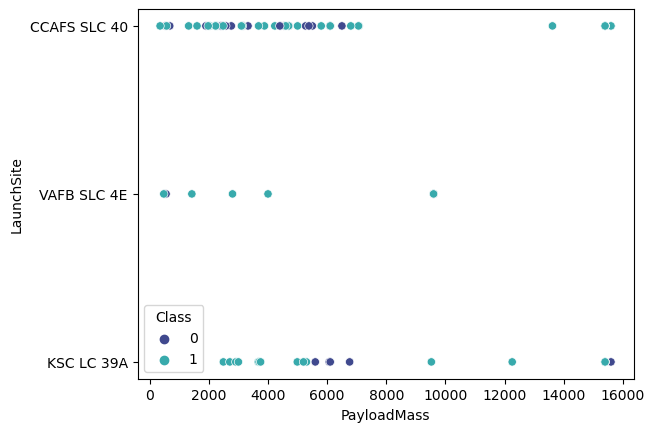

In [26]:
#Task 8
sns.scatterplot(x='PayloadMass',y='LaunchSite',data=df,hue='Class'
                ,palette='mako')

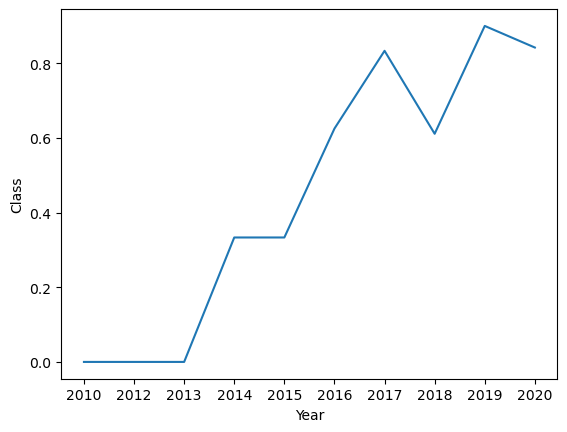

In [27]:
#Task9
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df['Year']= Extract_year()
df.head()
sns.lineplot(x='Year',y='Class',data=df,ci=None)

plt.show()

### Παρατηρω οτι με τα χρονια Οι προσγειωσεις ειναι ολο και πιο επιτυχεις !
### γκουντ τζομπ ιλον 

In [28]:
#Task10
features=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount','GridFins_True','Legs_True']

In [29]:
df.head(20)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,GridFins_True,Reused_True,Legs_True,Class,new_class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,0,0,Unsuccessful,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,0,0,Unsuccessful,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,0,0,Unsuccessful,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,NaN,1.0,0,B1003,-120.610829,34.632093,0,0,0,0,Unsuccessful,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,0,0,Unsuccessful,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,NaN,1.0,0,B1005,-80.577366,28.561857,0,0,0,0,Unsuccessful,2014
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,NaN,1.0,0,B1006,-80.577366,28.561857,0,0,1,1,Successful,2014
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,NaN,1.0,0,B1007,-80.577366,28.561857,0,0,1,1,Successful,2014
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,NaN,1.0,0,B1008,-80.577366,28.561857,0,0,0,0,Unsuccessful,2014
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,NaN,1.0,0,B1011,-80.577366,28.561857,0,0,0,0,Unsuccessful,2014


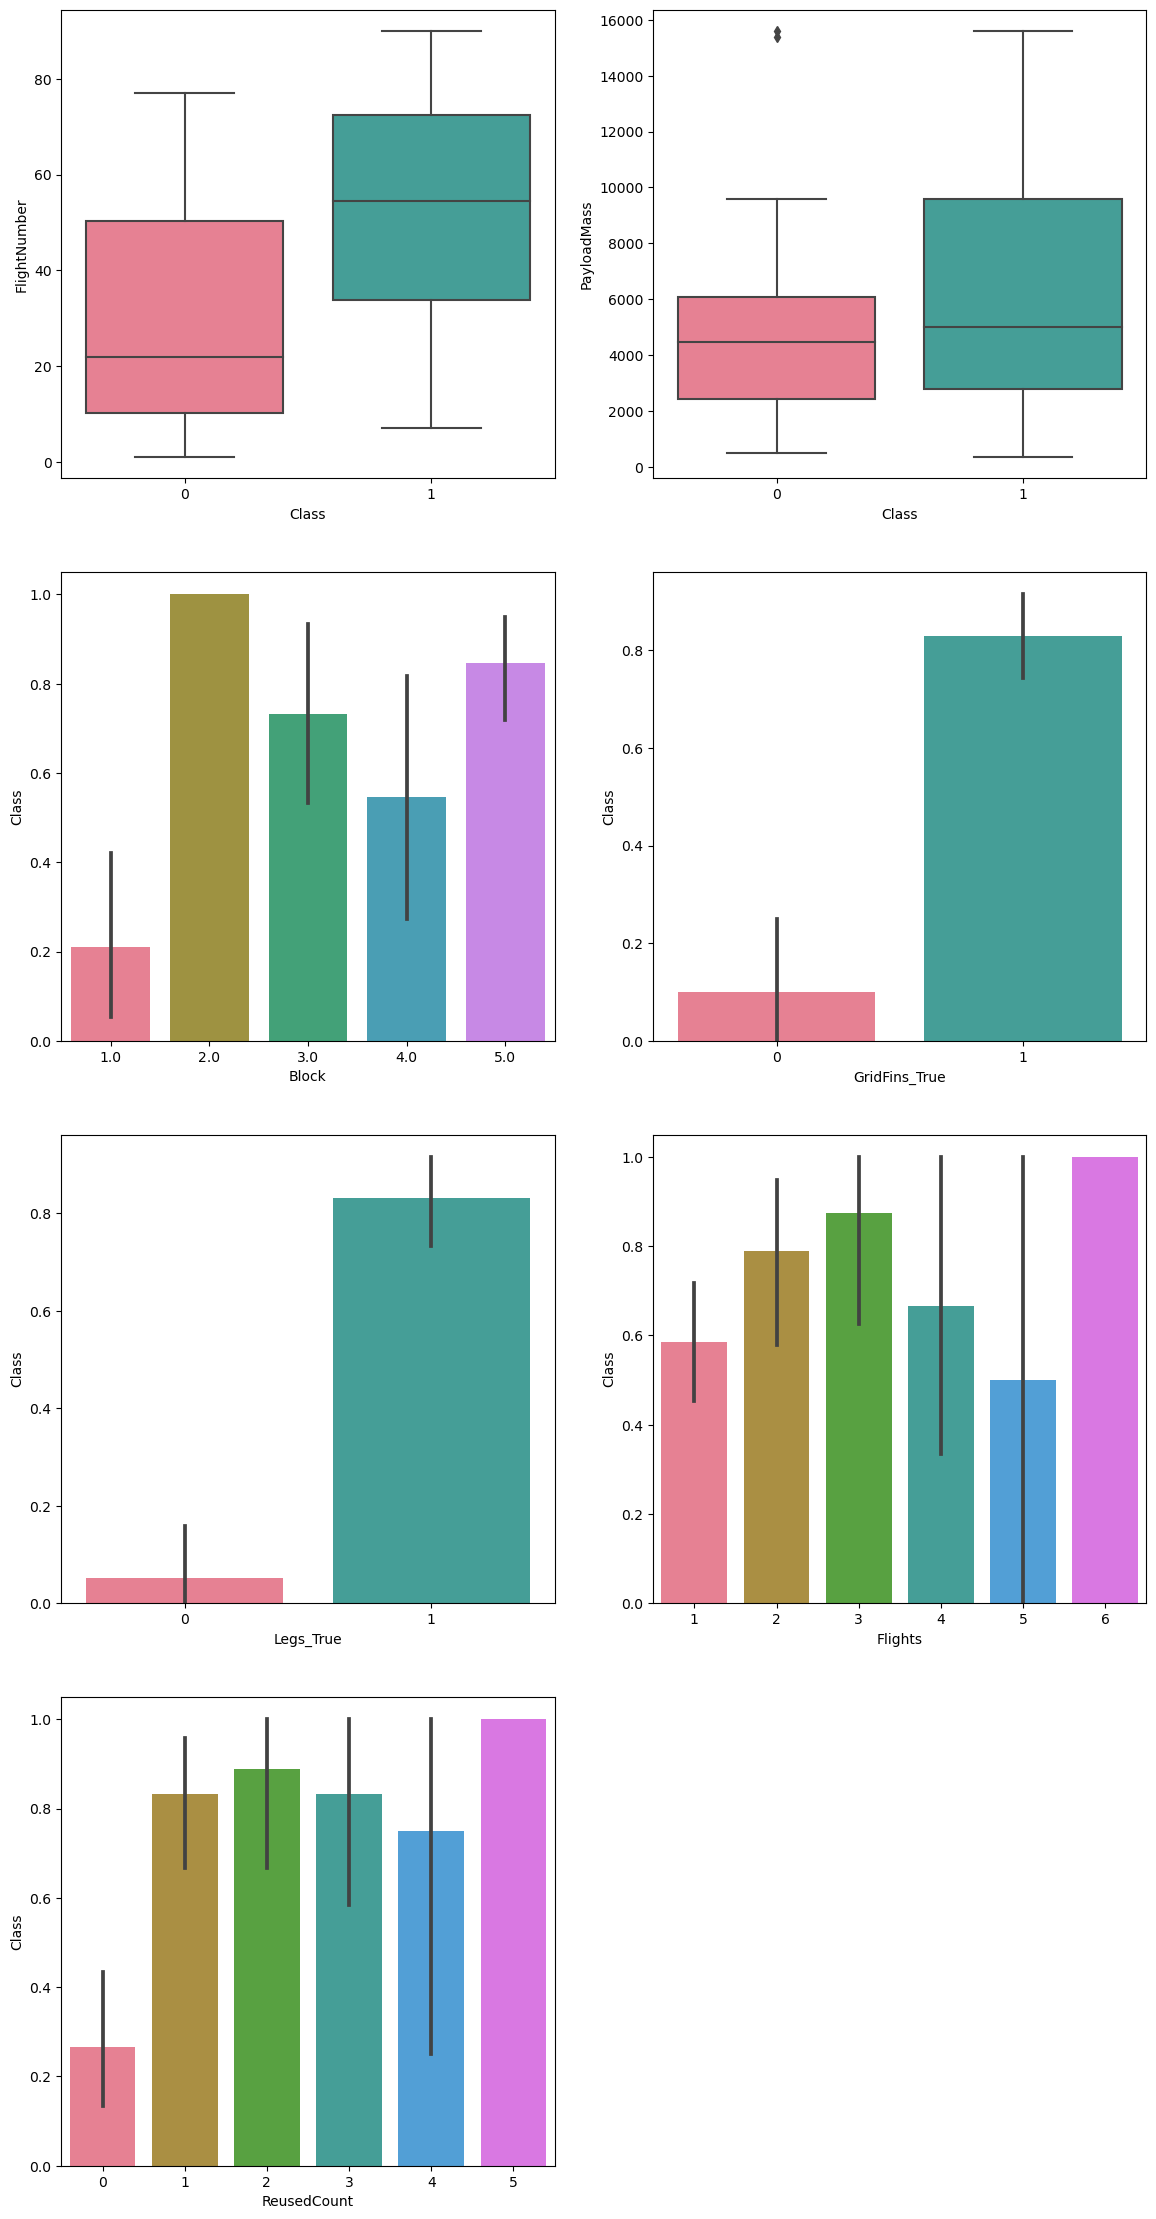

In [30]:
#Task11
categorical_cols=['Block','GridFins_True','Legs_True','Flights','ReusedCount']
continuous_cols=['FlightNumber','PayloadMass']

rows, cols = 4,2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))

axs = axs.flatten()
posn=0
for col in continuous_cols:
    sns.boxplot(x='Class',y=col,data=df,ax=axs[posn],palette='husl')
    posn+=1
    
for col in categorical_cols:
    sns.barplot(x=col,y='Class',data=df,ax=axs[posn],palette='husl')
    posn+=1
    
fig.delaxes(axs[-1])

In [31]:
#Task12
decision_tree=DecisionTreeClassifier(max_depth=5,criterion='entropy')
decision_tree.fit(df[features],df['Class'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

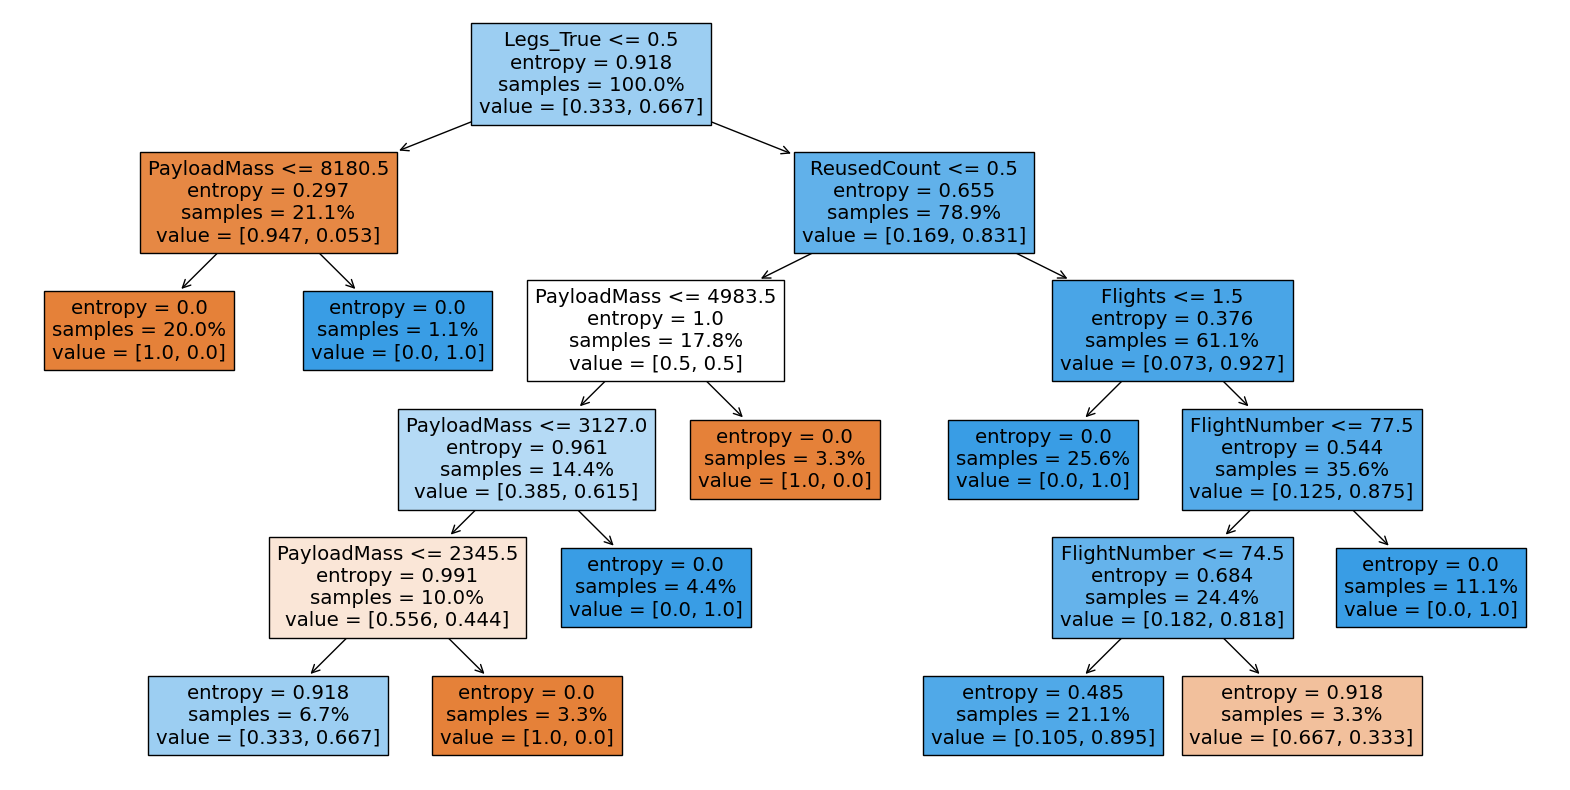

In [32]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree , proportion=True , feature_names=features , filled=True )
plt.savefig('decision_tree.pdf')

In [33]:
from sklearn.metrics import accuracy_score
akr1=metrics.accuracy_score(df['Class'],decision_tree.predict(df[features]))
print(akr1)

0.9444444444444444


In [34]:
#Task14
svc_model = SVC(kernel='linear')
svc_model.fit(df[features],df['Class'])

akr2=accuracy_score(df['Class'],svc_model.predict(df[features]))
print(akr2)

0.8333333333333334


In [35]:
#Task15
lin_model=linear_model.LogisticRegression()
lin_model.fit(df[features],df['Class'])

akr3=accuracy_score(df['Class'] , lin_model.predict(df[features]))
print(akr3)
            


0.8444444444444444


###  Task15 - Results observations :
 Ta apotelesmata fainontai poly kala me megali akrivia.
 Ostoso afti i akrivia einai pano sta dedomena poy exei ginei trained to model mas
 Opote tha prepei na akoloythisoyme me alles technikes gia na vgaloyme ena genikotero model.